MODEL CNN

In [1]:
import keras
import helpers
# import brewer2mpl
import numpy as np
import matplotlib.pyplot as plt 

# set3 = brewer2mpl.get_map('Set3', 'qualitative', 4).mpl_colors
%matplotlib inline

from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.models import Sequential

import tensorflow as tf
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib
from keras.models import model_from_json
from keras.optimizers import SGD
from tensorflow.python.framework import graph_util

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

C:\Users\DELL\Anaconda3\envs\tensorflowGPU\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
batch_size = 64
num_classes = 36
epochs = 250
img_rows, img_cols = 28, 28

print('Start loading data...\n')
files, labels = helpers.load_chars74k_data()
X, y = helpers.create_dataset(files, labels)
print('Data has been loaded')

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=2, train_size=0.8)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255.
x_test/=255.

print('Data latih :', x_train.shape[0])
print('Data Uji : ', x_test.shape[0],'\n')

print('Total Data : ', x_train.shape[0]+ x_test.shape[0])

Start loading data...

Data has been loaded
Data latih : 14316
Data Uji :  3579 

Total Data :  17895


C:\Users\DELL\Anaconda3\envs\tensorflowGPU\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [3]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [4]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# train_generator, validation_generator = helpers.create_datagenerator(x_train, x_test, y_train, y_test)

# Convolutional network will be build with Keras.
print('Start training the model.')
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, strides=1, \
        padding='same', activation='relu', \
        input_shape=[28, 28, 1]))
# 28*28*64
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
# 14*14*64

model.add(Conv2D(filters=128, kernel_size=3, strides=1, \
        padding='same', activation='relu'))
# 14*14*128
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
# 7*7*128

model.add(Conv2D(filters=256, kernel_size=3, strides=1, \
        padding='same', activation='relu'))
# 7*7*256
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
# 4*4*256

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(36, activation='softmax'))

sgd = SGD(lr=0.02, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=5)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sgd,
              metrics=['accuracy'])

'''
saves the model weights after each epoch if the validation loss decreased
'''
checkpointer = ModelCheckpoint(filepath='model/model.h5', verbose=2, save_best_only=True)

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[checkpointer])

Start training the model.
Train on 14316 samples, validate on 3579 samples
Epoch 1/250
14316/14316 [==============================] - 8s 563us/step - loss: 1.8244 - acc: 0.4924 - val_loss: 0.6250 - val_acc: 0.8268

Epoch 00001: val_loss improved from inf to 0.62499, saving model to model/model.h5
Epoch 2/250
14316/14316 [==============================] - 5s 320us/step - loss: 0.4532 - acc: 0.8713 - val_loss: 0.4291 - val_acc: 0.8779

Epoch 00002: val_loss improved from 0.62499 to 0.42913, saving model to model/model.h5
Epoch 3/250
14316/14316 [==============================] - 5s 319us/step - loss: 0.2677 - acc: 0.9204 - val_loss: 0.3388 - val_acc: 0.9056

Epoch 00003: val_loss improved from 0.42913 to 0.33880, saving model to model/model.h5
Epoch 4/250
14316/14316 [==============================] - 5s 317us/step - loss: 0.1778 - acc: 0.9466 - val_loss: 0.2991 - val_acc: 0.9170

Epoch 00004: val_loss improved from 0.33880 to 0.29914, saving model to model/model.h5
Epoch 5/250
14316/143


Epoch 00043: val_loss did not improve
Epoch 44/250
14316/14316 [==============================] - 5s 320us/step - loss: 4.0099e-05 - acc: 1.0000 - val_loss: 0.3651 - val_acc: 0.9452

Epoch 00044: val_loss did not improve
Epoch 45/250
14316/14316 [==============================] - 5s 317us/step - loss: 3.8456e-05 - acc: 1.0000 - val_loss: 0.3662 - val_acc: 0.9450

Epoch 00045: val_loss did not improve
Epoch 46/250
14316/14316 [==============================] - 5s 320us/step - loss: 3.6929e-05 - acc: 1.0000 - val_loss: 0.3670 - val_acc: 0.9450

Epoch 00046: val_loss did not improve
Epoch 47/250
14316/14316 [==============================] - 5s 323us/step - loss: 3.5670e-05 - acc: 1.0000 - val_loss: 0.3681 - val_acc: 0.9450

Epoch 00047: val_loss did not improve
Epoch 48/250
14316/14316 [==============================] - 5s 318us/step - loss: 3.4462e-05 - acc: 1.0000 - val_loss: 0.3692 - val_acc: 0.9447

Epoch 00048: val_loss did not improve
Epoch 49/250
14316/14316 [====================


Epoch 00088: val_loss did not improve
Epoch 89/250
14316/14316 [==============================] - 4s 301us/step - loss: 1.4327e-05 - acc: 1.0000 - val_loss: 0.3940 - val_acc: 0.9441

Epoch 00089: val_loss did not improve
Epoch 90/250
14316/14316 [==============================] - 4s 301us/step - loss: 1.4126e-05 - acc: 1.0000 - val_loss: 0.3943 - val_acc: 0.9444

Epoch 00090: val_loss did not improve
Epoch 91/250
14316/14316 [==============================] - 4s 305us/step - loss: 1.3925e-05 - acc: 1.0000 - val_loss: 0.3947 - val_acc: 0.9444

Epoch 00091: val_loss did not improve
Epoch 92/250
14316/14316 [==============================] - 4s 302us/step - loss: 1.3741e-05 - acc: 1.0000 - val_loss: 0.3951 - val_acc: 0.9444

Epoch 00092: val_loss did not improve
Epoch 93/250
14316/14316 [==============================] - 4s 302us/step - loss: 1.3561e-05 - acc: 1.0000 - val_loss: 0.3955 - val_acc: 0.9444

Epoch 00093: val_loss did not improve
Epoch 94/250
14316/14316 [====================

14316/14316 [==============================] - 4s 299us/step - loss: 8.7978e-06 - acc: 1.0000 - val_loss: 0.4076 - val_acc: 0.9441

Epoch 00133: val_loss did not improve
Epoch 134/250
14316/14316 [==============================] - 4s 301us/step - loss: 8.7311e-06 - acc: 1.0000 - val_loss: 0.4078 - val_acc: 0.9441

Epoch 00134: val_loss did not improve
Epoch 135/250
14316/14316 [==============================] - 4s 300us/step - loss: 8.6705e-06 - acc: 1.0000 - val_loss: 0.4080 - val_acc: 0.9441

Epoch 00135: val_loss did not improve
Epoch 136/250
14316/14316 [==============================] - 4s 302us/step - loss: 8.5915e-06 - acc: 1.0000 - val_loss: 0.4082 - val_acc: 0.9441

Epoch 00136: val_loss did not improve
Epoch 137/250
14316/14316 [==============================] - 4s 298us/step - loss: 8.5173e-06 - acc: 1.0000 - val_loss: 0.4085 - val_acc: 0.9441

Epoch 00137: val_loss did not improve
Epoch 138/250
14316/14316 [==============================] - 4s 303us/step - loss: 8.4370e-06 


Epoch 00177: val_loss did not improve
Epoch 178/250
14316/14316 [==============================] - 4s 302us/step - loss: 6.3180e-06 - acc: 1.0000 - val_loss: 0.4164 - val_acc: 0.9438

Epoch 00178: val_loss did not improve
Epoch 179/250
14316/14316 [==============================] - 4s 304us/step - loss: 6.2794e-06 - acc: 1.0000 - val_loss: 0.4166 - val_acc: 0.9438

Epoch 00179: val_loss did not improve
Epoch 180/250
14316/14316 [==============================] - 4s 307us/step - loss: 6.2400e-06 - acc: 1.0000 - val_loss: 0.4168 - val_acc: 0.9438

Epoch 00180: val_loss did not improve
Epoch 181/250
14316/14316 [==============================] - 4s 301us/step - loss: 6.1991e-06 - acc: 1.0000 - val_loss: 0.4170 - val_acc: 0.9438

Epoch 00181: val_loss did not improve
Epoch 182/250
14316/14316 [==============================] - 4s 303us/step - loss: 6.1629e-06 - acc: 1.0000 - val_loss: 0.4171 - val_acc: 0.9438

Epoch 00182: val_loss did not improve
Epoch 183/250
14316/14316 [==============

14316/14316 [==============================] - 4s 296us/step - loss: 4.9431e-06 - acc: 1.0000 - val_loss: 0.4227 - val_acc: 0.9438

Epoch 00222: val_loss did not improve
Epoch 223/250
14316/14316 [==============================] - 4s 294us/step - loss: 4.9171e-06 - acc: 1.0000 - val_loss: 0.4229 - val_acc: 0.9438

Epoch 00223: val_loss did not improve
Epoch 224/250
14316/14316 [==============================] - 4s 298us/step - loss: 4.8968e-06 - acc: 1.0000 - val_loss: 0.4230 - val_acc: 0.9438

Epoch 00224: val_loss did not improve
Epoch 225/250
14316/14316 [==============================] - 4s 299us/step - loss: 4.8702e-06 - acc: 1.0000 - val_loss: 0.4231 - val_acc: 0.9438

Epoch 00225: val_loss did not improve
Epoch 226/250
14316/14316 [==============================] - 4s 303us/step - loss: 4.8491e-06 - acc: 1.0000 - val_loss: 0.4233 - val_acc: 0.9438

Epoch 00226: val_loss did not improve
Epoch 227/250
14316/14316 [==============================] - 4s 299us/step - loss: 4.8289e-06 

dict_keys(['val_loss', 'val_acc', 'acc', 'loss'])


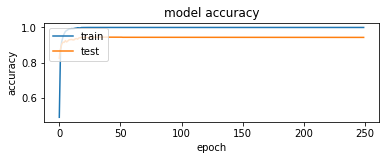

In [5]:
print(history.history.keys())  

plt.figure(1)  

# summarize history for accuracy  

plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  

# summarize history for loss  


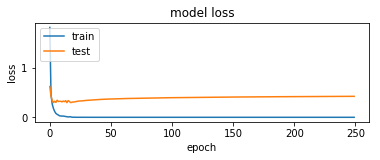

Model has been trained.
Test loss: 0.4259992352588655
Test accuracy:  94.38390613568166


In [6]:
# print("SGD")
 
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

# Calculate loss and accuracy.
score = model.evaluate(x_test, y_test, verbose=0)
print('Model has been trained.')
print('Test loss:', score[0])
print('Test accuracy: ', score[1]*100.0)

In [7]:
# def plot_filters(layer, x, y):
#     filters = layer.W.get_value()
#     fig = plt.figure(figsize=(8, 4))
#     for j in range(len(filters)):
#         ax = fig.add_subplot(y, x, j+1)
#         ax.matshow(filters[j][0], cmap = matplotlib.cm.Blues)
#         plt.xticks(np.array([]))
#         plt.yticks(np.array([]))
#     plt.tight_layout()
#     return plt

# plot_filters(model.layers[0], 8, 4)

In [8]:
for i, layer in enumerate(model.layers):
    print ("Layer", i, "\t", layer.name, "\t\t", layer.input_shape, "\t\t\t", layer.output_shape)
    

Layer 0 	 conv2d_1 		 (None, 28, 28, 1) 			 (None, 28, 28, 64)
Layer 1 	 max_pooling2d_1 		 (None, 28, 28, 64) 			 (None, 14, 14, 64)
Layer 2 	 conv2d_2 		 (None, 14, 14, 64) 			 (None, 14, 14, 128)
Layer 3 	 max_pooling2d_2 		 (None, 14, 14, 128) 			 (None, 7, 7, 128)
Layer 4 	 conv2d_3 		 (None, 7, 7, 128) 			 (None, 7, 7, 256)
Layer 5 	 max_pooling2d_3 		 (None, 7, 7, 256) 			 (None, 4, 4, 256)
Layer 6 	 flatten_1 		 (None, 4, 4, 256) 			 (None, 4096)
Layer 7 	 dense_1 		 (None, 4096) 			 (None, 1024)
Layer 8 	 dense_2 		 (None, 1024) 			 (None, 36)


In [9]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [10]:
#Save the model
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5

namaModel = "model.h5"
model.save_weights(namaModel)
print("Model : " + namaModel + " telah disimpan")

Model : model.h5 telah disimpan


## Data Uji

jumlah data uji : 3579
[[220   0   0 ...   0   0   0]
 [  1 227   0 ...   0   0   0]
 [  0   0 205 ...   0   0   0]
 ...
 [  0   0   0 ...  17   1   0]
 [  0   0   0 ...   1  25   0]
 [  0   0   0 ...   0   0  15]]


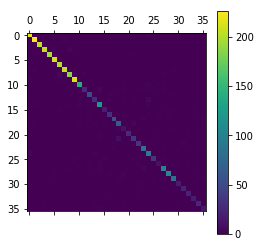

In [11]:
y_prob = model.predict(x_test, batch_size=batch_size, verbose=0)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in y_test]

print('jumlah data uji :', len(y_prob))

cm = confusion_matrix(y_true, y_pred)
print(cm)

plt.matshow(cm)
plt.colorbar()

In [12]:
labels = ['-----0-----', '-----1-----', '-----2-----', '-----3-----', '-----4-----', '-----5-----', '-----6-----', '-----7-----',
         '-----8-----', '-----9-----', '-----a-----', '-----b-----', '-----c-----', '-----d-----', '-----e-----', '-----f-----',
         '-----g-----', '-----h-----', '-----i-----', '-----j-----', '-----k-----', '-----l-----', '-----m-----', '-----n-----', 
         '-----o-----', '-----p-----', '-----q-----', '-----r-----', '-----s-----', '-----t-----', '-----u-----', '-----v-----', 
         '-----w-----', '-----x-----', '-----y-----', '-----z-----']

def class_precision(y_true, y_pred, character):
    cm = confusion_matrix(y_true, y_pred)
    i = [i for i, label in enumerate(labels) if label == character][0]
    col = [cm[j,i] for j in range(0,36)]
    return float(col[i])/sum(col)

def class_recall(y_true, y_pred, character):
    cm = confusion_matrix(y_true, y_pred)
    i = [i for i, label in enumerate(labels) if label == character][0]
    row = [cm[i,j] for j in range(0,36)]
    return float(row[i])/sum(row)

def class_accuracy(y_true, y_pred, character):
    cm = confusion_matrix(y_true, y_pred)
    i = [i for i, label in enumerate(labels) if label == character][0]
    tp = cm[i,i]
    fn = sum([cm[i,j] for j in range(0,36) if j != i])
    fp = sum([cm[j,i] for j in range(0,36) if j != i])
    tn = sum([cm[i,j] for j in range(0,36) for i in range(0,4)]) -(tp+fp+fn)
    return float(tp + tn)/sum([tp, fn, fp, tn])

In [13]:
for character in labels:
    print(character.upper())
    print('   acc = {0:.2f}'.format(class_accuracy(y_true, y_pred, character)))
    print('  prec = {0:.2f}'.format(class_precision(y_true, y_pred, character)))
    print('recall = {0:.2f}\n'.format(class_recall(y_true, y_pred, character)))
    
print('===============================================================')
print(classification_report(y_true, y_pred, target_names=labels))

-----0-----
   acc = 0.99
  prec = 0.97
recall = 0.99

-----1-----
   acc = 0.99
  prec = 0.98
recall = 0.97

-----2-----
   acc = 1.00
  prec = 0.99
recall = 1.00

-----3-----
   acc = 0.99
  prec = 1.00
recall = 0.96

-----4-----
   acc = 1.00
  prec = 0.98
recall = 0.99

-----5-----
   acc = 1.00
  prec = 0.98
recall = 1.00

-----6-----
   acc = 0.99
  prec = 0.97
recall = 0.99

-----7-----
   acc = 0.99
  prec = 0.98
recall = 0.99

-----8-----
   acc = 0.98
  prec = 0.96
recall = 0.95

-----9-----
   acc = 0.99
  prec = 0.98
recall = 0.98

-----A-----
   acc = 0.98
  prec = 0.95
recall = 0.96

-----B-----
   acc = 0.98
  prec = 0.90
recall = 0.72

-----C-----
   acc = 0.99
  prec = 0.91
recall = 0.91

-----D-----
   acc = 0.99
  prec = 0.88
recall = 0.77

-----E-----
   acc = 0.97
  prec = 0.90
recall = 0.93

-----F-----
   acc = 0.99
  prec = 0.78
recall = 0.82

-----G-----
   acc = 0.99
  prec = 0.91
recall = 0.86

-----H-----
   acc = 0.99
  prec = 0.93
recall = 0.89

-----I----

## Data Latih

jumlah data latih : 14316
[[898   0   0 ...   0   0   0]
 [  0 860   0 ...   0   0   0]
 [  0   0 880 ...   0   0   0]
 ...
 [  0   0   0 ...  95   0   0]
 [  0   0   0 ...   0  80   0]
 [  0   0   0 ...   0   0  70]]


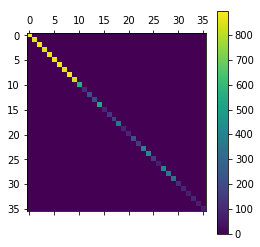

In [14]:
y_prob = model.predict(x_train, batch_size=batch_size, verbose=0)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in y_train]

print('jumlah data latih :', len(y_prob))

cm = confusion_matrix(y_true, y_pred)
print(cm)

plt.matshow(cm)
plt.colorbar()

In [15]:
for character in labels:
    print(character.upper())
    print('   acc = {0:.2f}'.format(class_accuracy(y_true, y_pred, character)))
    print('  prec = {0:.2f}'.format(class_precision(y_true, y_pred, character)))
    print('recall = {0:.2f}\n'.format(class_recall(y_true, y_pred, character)))
    
print('===============================================================')
print(classification_report(y_true, y_pred, target_names=labels))

-----0-----
   acc = 1.00
  prec = 1.00
recall = 1.00

-----1-----
   acc = 1.00
  prec = 1.00
recall = 1.00

-----2-----
   acc = 1.00
  prec = 1.00
recall = 1.00

-----3-----
   acc = 1.00
  prec = 1.00
recall = 1.00

-----4-----
   acc = 1.00
  prec = 1.00
recall = 1.00

-----5-----
   acc = 1.00
  prec = 1.00
recall = 1.00

-----6-----
   acc = 1.00
  prec = 1.00
recall = 1.00

-----7-----
   acc = 1.00
  prec = 1.00
recall = 1.00

-----8-----
   acc = 1.00
  prec = 1.00
recall = 1.00

-----9-----
   acc = 1.00
  prec = 1.00
recall = 1.00

-----A-----
   acc = 1.00
  prec = 1.00
recall = 1.00

-----B-----
   acc = 1.00
  prec = 1.00
recall = 1.00

-----C-----
   acc = 1.00
  prec = 1.00
recall = 1.00

-----D-----
   acc = 1.00
  prec = 1.00
recall = 1.00

-----E-----
   acc = 1.00
  prec = 1.00
recall = 1.00

-----F-----
   acc = 1.00
  prec = 1.00
recall = 1.00

-----G-----
   acc = 1.00
  prec = 1.00
recall = 1.00

-----H-----
   acc = 1.00
  prec = 1.00
recall = 1.00

-----I----

In [16]:
# K.set_learning_phase(0)
# sess = K.get_session()

# output_node_name = "dense_2/Softmax" # Name of your output node

# with sess as sess:
#     init_op = tf.global_variables_initializer()
#     sess.run(init_op)
#     graph_def = sess.graph.as_graph_def()
#     output_graph_def = graph_util.convert_variables_to_constants(
#                                                                  sess,
#                                                                  sess.graph.as_graph_def(),
#                                                                  output_node_name.split(","))
#     tf.train.write_graph(output_graph_def,
#                          logdir="model",
#                          name="my_model.pb",
#                          as_text=False)